In [98]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [99]:
enron = pd.read_csv(os.path.join('enron_salary_numeric.csv'))
enron_numeric_df = pd.DataFrame(enron)
enron_numeric_df.head()

,name,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
0,METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,585062.0,702.0,0.0,...,0.0,29.0,1740.0,1.0,False,0.0,0.0,0.0,mark.metts@enron.com,38.0
1,BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,...,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0,0.0
2,ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,4890344.0,350000.0,1788391.0,0.0,0.0,...,0.0,0.0,12961.0,0.0,False,0.0,-400729.0,0.0,steven.elliott@enron.com,0.0
3,CORDES WILLIAM R,0.0,764.0,0.0,0.0,651850.0,0.0,386335.0,58.0,0.0,...,0.0,12.0,0.0,0.0,False,0.0,0.0,0.0,bill.cordes@enron.com,10.0
4,HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,...,0.0,32.0,11350.0,21.0,True,0.0,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0


In [100]:
enron_numeric_df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [101]:
bonus = enron_numeric_df['bonus']
salary = enron_numeric_df['salary']
name = enron_numeric_df['name']

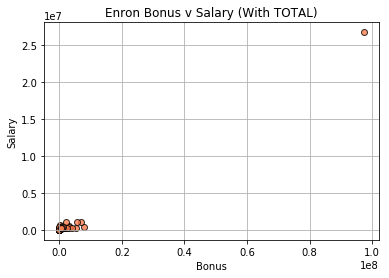

In [102]:
plt.scatter(bonus, 
            salary, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.title("Enron Bonus v Salary (With TOTAL)")
plt.ylabel("Salary")
plt.xlabel("Bonus")
plt.grid(True)

plt.savefig("Salary_v_Bonus_total.png")
plt.show()

In [103]:
enron_numeric_trimmed_df = enron_numeric_df[enron_numeric_df.name != 'TOTAL']

In [104]:
enron_numeric_trimmed_df['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

In [107]:
poi = enron_numeric_trimmed_df[enron_numeric_trimmed_df.poi == True]

non_poi = enron_numeric_trimmed_df[enron_numeric_trimmed_df.poi == False]


bonus_poi = poi['bonus']
salary_poi = poi['salary']
bonus_non_poi = non_poi['bonus']
salary_non_poi = non_poi['salary']

<function matplotlib.pyplot.show(*args, **kw)>

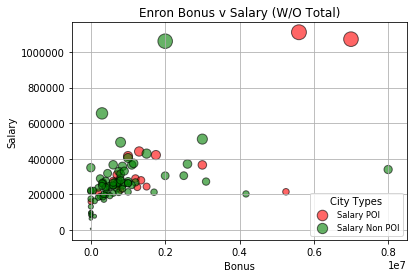

In [118]:
plt.scatter(bonus_poi, 
            salary_poi,
            s=.0002*salary_poi,
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Salary POI")

plt.scatter(bonus_non_poi, 
            salary_non_poi,
            s=.0002*salary_non_poi,
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.6, label="Salary Non POI")


plt.title("Enron Bonus v Salary (W/O Total)")
plt.ylabel("Salary")
plt.xlabel("Bonus")
plt.grid(True)
plt.xticks()


plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="lower right", title="City Types", 
                  labelspacing=0.5)

# plt.scatter(rural_ride_count,
#            rural_avg_fare,
#            s=10*rural_driver_count, c="gold",
#            edgecolor="black", linewidths=1, marker="o",
#            alpha=0.8, label="Rural")

plt.savefig("Salary_v_Bonus_no_total.png")
plt.show

In [55]:
avg_salary = enron_numeric_trimmed_df.groupby(["poi"]).mean()["salary"]
poi = ['False', 'True']
poi

['False', 'True']

<function matplotlib.pyplot.show(*args, **kw)>

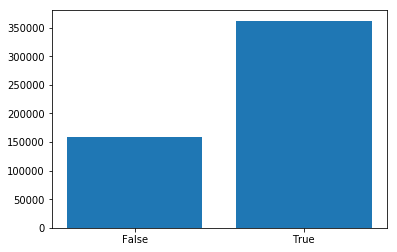

In [56]:
plt.bar(poi, avg_salary)
plt.show

In [57]:
avg_bonus = enron_numeric_trimmed_df.groupby(["poi"]).mean()["bonus"]

<function matplotlib.pyplot.show(*args, **kw)>

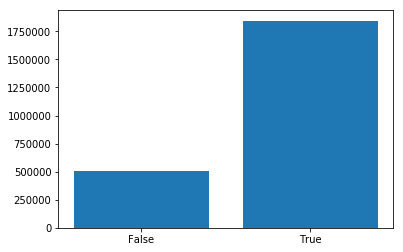

In [58]:
plt.bar(poi, avg_bonus)
plt.show